# Proyek Analisis Data: Bike Sharing Dataset - Day
- **Nama:** Aisyah Nuraini
- **Email:** aisyahnuraini047@gmail.com
- **ID Dicoding:** aisyahaini

## Menentukan Pertanyaan Bisnis

- 1. Apakah kondisi cuaca dan hari kerja dapat memengaruhi jumlah sepeda yang dipinjam?
- 2. Bagaimana hubungan suhu dan kelembapan dengan jumlah peminjaman sepeda?

## Import Semua Packages/Library yang Digunakan

Import library yang digunakan

In [32]:
#import library yang digunakan
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Data Wrangling

**Data Wrangling** digunakan untuk mengumpulkan data yang dibutuhkan untuk menjawab pertanyaan analisis yang telah dibuat sebelumnya.

### Gathering Data

**Gathering data** digunakan utuk mengumpulkan data

Menggunakan fungsi dari **Pandas** untuk membaca file CSV

In [33]:
#membaca file csv dan menampilkan 10 teratas
df = pd.read_csv("https://raw.githubusercontent.com/aisyahaini/dicoding_project/refs/heads/main/data%20science/Proyek%20akhir%20dicoding%20bike%20sharing%20dataset/day.csv")
df.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
5,6,2011-01-06,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88,1518,1606
6,7,2011-01-07,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,1362,1510
7,8,2011-01-08,1,0,1,0,6,0,2,0.165000,0.162254,0.535833,0.266804,68,891,959
8,9,2011-01-09,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.361950,54,768,822
9,10,2011-01-10,1,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,41,1280,1321


**Insight:**
- Dataset Bike Sharing (Day) memiliki 16 Kolom
- Pada gathering data menggunakan fungsi dari Pandas yaitu pd.read_csv yang berguna untuk membaca file CSV yang berisi data Bike Sharing (Day)

### Assessing Data

**Assessing Data** digunakan untuk mengindentifikasi masalah yang terdapat dalam data dan memastikan data berkualitas.

**Mengetahui info dari dataframe**



In [34]:
# Untuk mengetahui info dari dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


**Mengecek apakah ada data yang berisi null**

In [35]:
#untuk mengecek jumlah data null
df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


**Mengecek apakah ada data yang duplikat**

In [36]:
# Untuk mengecek data yang duplikat
df.duplicated().sum()

0

**Menampilkan data numerik yang mengandung outlier**

<Axes: >

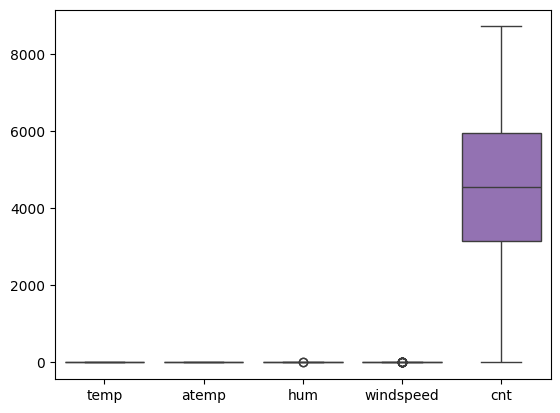

In [37]:
# Untuk menampilkan box plot yang menunjukkan outlier data
sns.boxplot(data=df[['temp', 'atemp', 'hum', 'windspeed', 'cnt']])

**Menghitung jumlah outlier pada setiap kolom dataframe**

In [38]:
# Perhitungan IQR untuk setiap kolom
columns_to_check = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']
Q1 = df[columns_to_check].quantile(0.25)  # Kuartil pertama
Q3 = df[columns_to_check].quantile(0.75)  # Kuartil ketiga
IQR = Q3 - Q1                             # Rentang antar kuartil
lower_bound = Q1 - 1.5 * IQR              # Batas bawah
upper_bound = Q3 + 1.5 * IQR              # Batas atas

# Menampilkan jumlah outlier per kolom
for col in columns_to_check:
    outliers = df[(df[col] < lower_bound[col]) | (df[col] > upper_bound[col])].index
    print(f"Jumlah outlier pada kolom '{col}': {len(outliers)}")

Jumlah outlier pada kolom 'temp': 0
Jumlah outlier pada kolom 'atemp': 0
Jumlah outlier pada kolom 'hum': 2
Jumlah outlier pada kolom 'windspeed': 13
Jumlah outlier pada kolom 'cnt': 0


Outlier terdapat pada kolom 'hum' dan 'windspeed', kemudian untuk umlah outlier terbanyak pada kolom 'windspeed'

**Insight:**
- Assessing data bertujuan untuk mengidentifikasi masalah yang terdapat dalam data dan memastikan data tersebut berkualitas.

- Dari dataframe yang digunakan terdapat 731 data dengan 16 kolom

- Tidak ada data yang kosong atau missing value

- Tidak ada data yang duplikat

- Outlier terdapat pada kolom 'hum' dan 'windspeed', kemudian untuk umlah outlier terbanyak pada kolom 'windspeed'

### Cleaning Data

**Cleaning Data** digunakan untuk membersihkan data agar siap untuk dilakukan proses selanjutnya.

**Mengganti data yang terdapat outlier dengan mean**

In [39]:
# Mengganti outlier dengan mean
for col in columns_to_check:
    mean = df[col].mean()
    df[col] = df[col].apply(lambda x: mean if x < lower_bound[col] or x > upper_bound[col] else x)

print("Dataset setelah mengganti outlier dengan mean:")
print(df.describe())


Dataset setelah mengganti outlier dengan mean:
          instant      season          yr        mnth     holiday     weekday  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean   366.000000    2.496580    0.500684    6.519836    0.028728    2.997264   
std    211.165812    1.110807    0.500342    3.451913    0.167155    2.004787   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.500000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    366.000000    3.000000    1.000000    7.000000    0.000000    3.000000   
75%    548.500000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    731.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean     0.683995    1.395349    0.495385    0.474354    0.62

**Menyimpan dataset ke dalam file CSV untuk pengembangan aplikasi Streamlit**

In [40]:
# Menyimpan dataset ke dalam file CSV digunakan untuk pengembangan aplikasi Streamlit
output_file = "dataset_cleaned.csv"
df.to_csv(output_file, index=False)

print(f"Dataset telah disimpan ke dalam file: {output_file}")


Dataset telah disimpan ke dalam file: dataset_cleaned.csv


**Insight:**
1. Mengganti data yang outlier dengan mean dari data

## Exploratory Data Analysis (EDA)

**Exploratory Data Analysis (EDA)** merupakan tahap eksplorasi data yang telah dibersihkan guna memperoleh insight dan menjawab pertanyaan analisis.

### Explore `Dataset Bike Sharing`

**Dalam fungsi `df.sample(5)` digunakan untuk menampilkan sample data secara random sebanyak 5 data**

In [41]:
# Menampilkan 5 data sample
df.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
438,439,2012-03-14,1,1,3,0,3,1,1,0.572500,0.548617,0.507083,0.115062,997,5315,6312
318,319,2011-11-15,4,0,11,0,2,1,2,0.530000,0.507579,0.688750,0.199633,449,3746,4195
508,509,2012-05-23,2,1,5,0,3,1,2,0.621667,0.584612,0.774583,0.102000,766,4494,5260
617,618,2012-09-09,3,1,9,0,0,0,1,0.610000,0.578925,0.547500,0.224496,2570,5657,8227
628,629,2012-09-20,3,1,9,0,4,1,1,0.546667,0.532192,0.618333,0.118167,939,6781,7720


**Di bawah ini akan menampilkan ringkasan statistik dari dataframe**

In [42]:
df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.629355,0.186465,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.139566,0.071151,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.254167,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.522291,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.627894,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.229785,1096.000000,4776.500000,5956.000000


**Menampilkan semua jumlah cuaca dari dataframe**

In [70]:
# Mengganti nilai numerik pada kolom 'season' dengan label deskriptif
df['weathersit'] = df['weathersit']
df.groupby(by="weathersit").instant.nunique().sort_values(ascending=False)

,instant
weathersit,
Cerah/Mendung,463
Berkabut/Gerimis,247
Hujan Ringan/Snow,21


Visualisasi persebaran jumlah cuaca pada dataframe

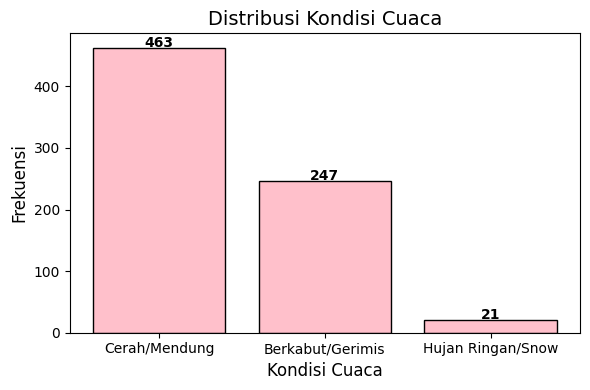

In [71]:
# Tambahkan label kondisi cuaca ke dataframe
df['weather_label'] = df['weathersit']

# Hitung distribusi kondisi cuaca
weather_distribution = df['weather_label'].value_counts().reset_index()
weather_distribution.columns = ['Kondisi Cuaca', 'Frekuensi']

# Buat bar plot
plt.figure(figsize=(6, 4))
bars = plt.bar(weather_distribution['Kondisi Cuaca'], weather_distribution['Frekuensi'], color='pink', edgecolor='black')

# Tambahkan angka di atas setiap bar
for bar in bars:
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() + 1,
        str(bar.get_height()),
        ha='center',
        fontsize=10,
        fontweight='bold'
    )

# Tambahkan judul dan label sumbu
plt.title("Distribusi Kondisi Cuaca", fontsize=14)
plt.xlabel("Kondisi Cuaca", fontsize=12)
plt.ylabel("Frekuensi", fontsize=12)

# Tampilkan plot
plt.tight_layout()
plt.show()

Jumlah cuaca terbanyak dalam peminjaman sepeda adalah pada cuaca cerah/mendung.

**Menampilkan persebaran jumlah season**

In [45]:
# Mapping untuk mengganti nilai numerik dengan deskripsi
season_mapping = {1: "winter", 2: "spring", 3: "summer", 4: "fall"}

# Mengganti nilai numerik pada kolom 'season' dengan label deskriptif
df['season'] = df['season'].replace(season_mapping)
df.groupby(by="season").instant.nunique().sort_values(ascending=False)

,instant
season,
summer,188
spring,184
winter,181
fall,178


Jumlah season terbanyak untuk peminjaman sepeda pada musim summer (semi)

**Menampilkan jumlah peminjaman sepeda pada hari libur atau hari kerja**

In [46]:
# Kelompokkan data berdasarkan workingday dan hitung total jumlah peminjaman sepeda
result = df.groupby('workingday')['cnt'].sum().reset_index()

# Ubah nilai pada kolom 'workingday' menjadi deskriptif
result['workingday'] = result['workingday'].map({1: 'Working Day', 0: 'Non-Working Day'})

# Output hasil dalam bentuk tabel
print(result)

        workingday      cnt
0  Non-Working Day  1000269
1      Working Day  2292410


Menampilkan visualisasi dari rata-rata data jumlah peminjaman sepeda berdasarkan hari kerja atau tidak

<ipython-input-47-a146f7b0c50f>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=workingday_analysis, x='Working Day', y='Rata-rata Peminjaman', palette='Blues_d')


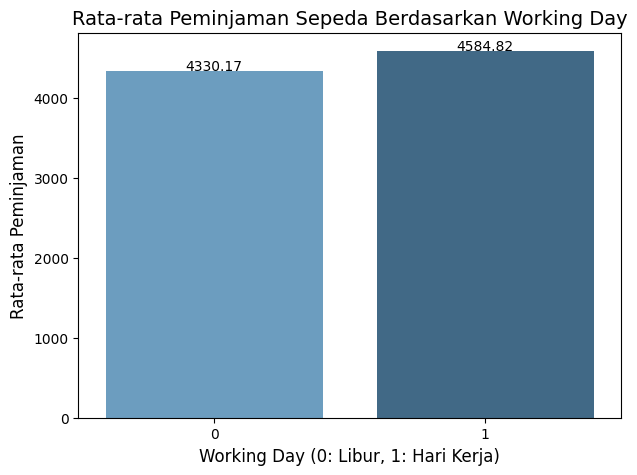

In [47]:
# Hitung rata-rata peminjaman sepeda berdasarkan workingday
workingday_analysis = df.groupby('workingday')['cnt'].mean().reset_index()
workingday_analysis.columns = ['Working Day', 'Rata-rata Peminjaman']

# Visualisasi rata-rata peminjaman berdasarkan Working Day
plt.figure(figsize=(7, 5))
sns.barplot(data=workingday_analysis, x='Working Day', y='Rata-rata Peminjaman', palette='Blues_d')
plt.title('Rata-rata Peminjaman Sepeda Berdasarkan Working Day', fontsize=14)
plt.xlabel('Working Day (0: Libur, 1: Hari Kerja)', fontsize=12)
plt.ylabel('Rata-rata Peminjaman', fontsize=12)
for index, row in workingday_analysis.iterrows():
    plt.text(index, row['Rata-rata Peminjaman'] + 10, round(row['Rata-rata Peminjaman'], 2), ha='center', fontsize=10)
plt.show()

Dalam peminjaman sepeda, jumlah pinjam sepeda lebih banyak dilakukan pada hari kerja

**Di bawah ini akan menampilkan data tertentu pada tahun 2011 dengan keterkaitan degan kolom month, working day dan jumlahnya**

In [48]:
# Filter data untuk tahun 2011 (yr = 0) dan hari kerja (workingday = 1)
filtered_data = df[(df['yr'] == 0) & (df['workingday'] == 1)]

# Pilih kolom yang ingin ditampilkan dan ubah label kolom 'mnth' menjadi 'month'
result = filtered_data[['instant', 'dteday', 'mnth', 'workingday', 'cnt']].rename(columns={'mnth': 'month'})

# Output hasil
print(result)

     instant      dteday  month  workingday   cnt
2          3  2011-01-03      1           1  1349
3          4  2011-01-04      1           1  1562
4          5  2011-01-05      1           1  1600
5          6  2011-01-06      1           1  1606
6          7  2011-01-07      1           1  1510
..       ...         ...    ...         ...   ...
356      357  2011-12-23     12           1  2209
360      361  2011-12-27     12           1  1162
361      362  2011-12-28     12           1  2302
362      363  2011-12-29     12           1  2423
363      364  2011-12-30     12           1  2999

[250 rows x 5 columns]


Pada tahun 2011 dengan hari kerja maka data yang dapat ditampilkan pada bulan Januari sampai Desember dengan jumlah 250 data.

**Di bawah ini akan menampilkan data tertentu pada tahun 2012 dengan keterkaitan degan kolom month, working day dan jumlahnya**

In [49]:
# Filter data untuk tahun 2012 (yr = 1) dan hari kerja (workingday = 0)
filtered_data = df[(df['yr'] == 1) & (df['workingday'] == 0)]

# Pilih kolom yang ingin ditampilkan dan ubah label kolom 'mnth' menjadi 'month'
result = filtered_data[['instant', 'dteday', 'mnth', 'workingday', 'cnt']].rename(columns={'mnth': 'month'})

# Output hasil
print(result)

     instant      dteday  month  workingday   cnt
365      366  2012-01-01      1           0  2294
366      367  2012-01-02      1           0  1951
371      372  2012-01-07      1           0  4521
372      373  2012-01-08      1           0  3425
378      379  2012-01-14      1           0  2493
..       ...         ...    ...         ...   ...
721      722  2012-12-22     12           0  1749
722      723  2012-12-23     12           0  1787
724      725  2012-12-25     12           0  1013
728      729  2012-12-29     12           0  1341
729      730  2012-12-30     12           0  1796

[116 rows x 5 columns]


Pada tahun 2012 dengan hari libur maka data yang dapat ditampilkan pada bulan Januari sampai Desember dengan jumlah 116 data.

**Menampilkan jumlah peminjaman sepeda berdasarkan dengan status casual atau sudah terdaftar sebagai member.**

In [50]:
# Convert the 'casual' column to numeric type, handling errors by coercing to NaN
df['casual'] = pd.to_numeric(df['casual'], errors='coerce')

# Menampilkan jumlah pada kolom 'casual' dan 'registered'
total_casual = df['casual'].sum()
total_registered = df['registered'].sum()

# Menampilkan hasil
print(f"Jumlah peminjaman sepeda dengan status casual: {total_casual}")
print(f"Jumlah peminjaman sepeda dengan status registered: {total_registered}")

Jumlah peminjaman sepeda dengan status casual: 620017
Jumlah peminjaman sepeda dengan status registered: 2672662


Visualisasi data dengan jumlah peminjaman sepeda berdasarkan status casual dan terdaftar sebagai member

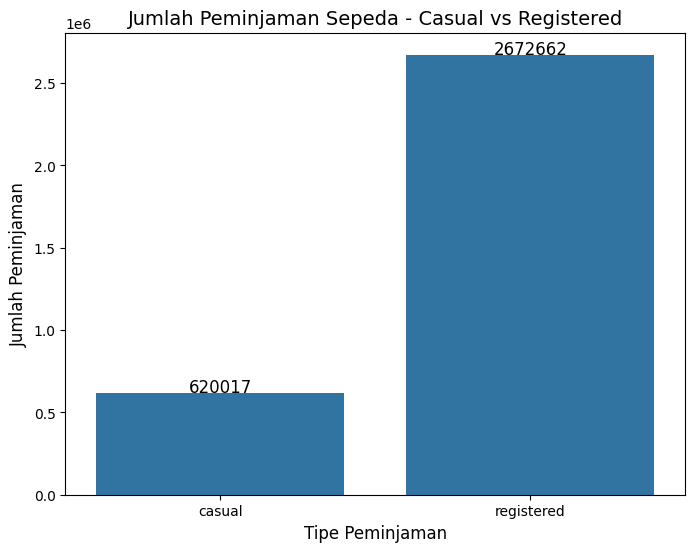

In [51]:
# Hitung jumlah peminjaman sepeda untuk kolom casual dan registered
df_sum = df[['casual', 'registered']].sum().reset_index()
df_sum.columns = ['Tipe Peminjaman', 'Jumlah Peminjaman']

# Visualisasi menggunakan bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x='Tipe Peminjaman', y='Jumlah Peminjaman', data=df_sum)

# Menambahkan angka pada setiap bar
for i, value in enumerate(df_sum['Jumlah Peminjaman']):
    plt.text(i, value + 50, f'{value}', ha='center', fontsize=12, color='black')

plt.title('Jumlah Peminjaman Sepeda - Casual vs Registered', fontsize=14)
plt.xlabel('Tipe Peminjaman', fontsize=12)
plt.ylabel('Jumlah Peminjaman', fontsize=12)

plt.show()

Jumlah peminjaman sepeda terbanyak dilakukan pada orang yang berstatus sebagai member dari peminjaman sepeda dengan total 2672662 peminjaman

**Menampilkan jumlah peminjaman sepeda berdasarkan hari**

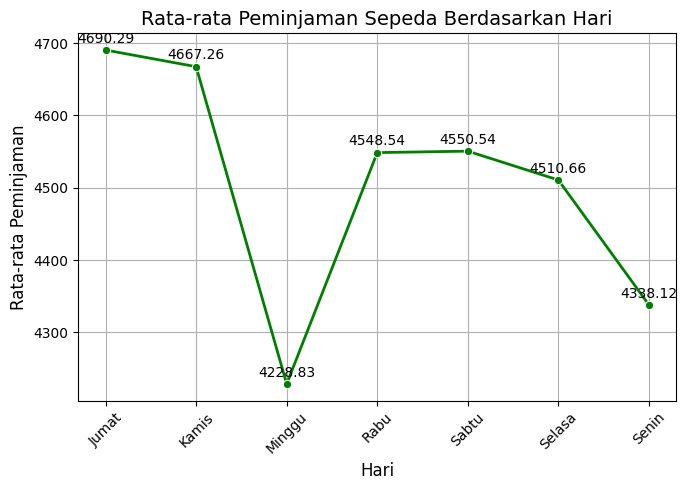

In [52]:
# Mapping untuk kolom weekday
weekday_labels = {
    0: "Minggu",
    1: "Senin",
    2: "Selasa",
    3: "Rabu",
    4: "Kamis",
    5: "Jumat",
    6: "Sabtu"
}

# Membuat kolom baru
df['weekday_labels'] = df['weekday'].map(weekday_labels)

# Hitung rata-rata peminjaman sepeda berdasarkan weekday_labels
weekday_analysis = df.groupby('weekday_labels')['cnt'].mean().reset_index()
weekday_analysis.columns = ['Hari', 'Rata-rata Peminjaman']

# Visualisasi rata-rata peminjaman berdasarkan Weekday dalam Line Chart
plt.figure(figsize=(7, 5))
sns.lineplot(data=weekday_analysis, x='Hari', y='Rata-rata Peminjaman', marker='o', color='green', linewidth=2)
plt.title('Rata-rata Peminjaman Sepeda Berdasarkan Hari', fontsize=14)
plt.xlabel('Hari', fontsize=12)
plt.ylabel('Rata-rata Peminjaman', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)

# Menambahkan angka di titik data
for index, row in weekday_analysis.iterrows():
    plt.text(index, row['Rata-rata Peminjaman'] + 10, round(row['Rata-rata Peminjaman'], 2), ha='center', fontsize=10)

plt.tight_layout()
plt.show()

Jumlah rata-rata peminjaman sepeda terbanyak dilakukan pada hari Jumat dengan jumlah 4690,29

**Menampilkan jumlah peminjaman sepeda berdasarkan suhu, kelembapan, dan kecepetan angin dengan nilai terendah dan tertinggi**

In [53]:
# Menentukan nilai minimum dan maksimum untuk suhu, kelembapan, dan kecepatan angin
temp_min = df['temp'].min()
temp_max = df['temp'].max()
hum_min = df['hum'].min()
hum_max = df['hum'].max()
wind_min = df['windspeed'].min()
wind_max = df['windspeed'].max()

# Filter data untuk kondisi minimum dan maksimum
conditions = [
    (df['temp'] == temp_min),
    (df['temp'] == temp_max),
    (df['hum'] == hum_min),
    (df['hum'] == hum_max),
    (df['windspeed'] == wind_min),
    (df['windspeed'] == wind_max)
]

# Buat DataFrame untuk menyimpan hasilnya
result = pd.DataFrame({
    'Metric': ['temp_min', 'temp_max', 'hum_min', 'hum_max', 'wind_min', 'wind_max'],
    'Value': [temp_min, temp_max, hum_min, hum_max, wind_min, wind_max],
    'Total Rentals': [df[cond]['cnt'].sum() for cond in conditions]
})

# Menampilkan hasil
print(result)

     Metric     Value  Total Rentals
0  temp_min  0.059130            981
1  temp_max  0.861667           4840
2   hum_min  0.254167           6857
3   hum_max  0.972500           2395
4  wind_min  0.022392           4985
5  wind_max  0.378108           3214


Dalam peminjaman sepeda, jumlah peminjaman meningkat pada temperature suhu yang maksimal, kemudian kelembapan yang minimal, dan kecepatan angin yang minimal

**Menampilkan suhu dan kelembapan tertentu dengan jumlah peminjaman sepeda**

In [54]:
# Filter data berdasarkan rentang suhu
filtered_suhu = df[(df['temp'] >= 0.3) & (df['temp'] <= 0.55)]
# Filter data berdasarkan rentang kelembapan
filtered_kelembapan = df[(df['hum'] >= 0.65) & (df['hum'] <= 0.80)]

# Menampilkan jumlah peminjaman untuk rentang suhu tertentu
total_peminjaman_suhu = filtered_suhu['cnt'].sum()

# Menampilkan jumlah peminjaman untuk rentang kelembapan tertentu
total_peminjaman_kelembapan = filtered_kelembapan['cnt'].sum()

# Menampilkan hasil
print(f"Jumlah peminjaman pada rentang suhu 0.3 sampai 0.55: {total_peminjaman_suhu}")
print(f"Jumlah peminjaman pada rentang kelembapan 0.65 sampai 0.80: {total_peminjaman_kelembapan}")

Jumlah peminjaman pada rentang suhu 0.3 sampai 0.55: 1247693
Jumlah peminjaman pada rentang kelembapan 0.65 sampai 0.80: 1079263


**Menampilkan scatter plot yang menunjukkan hubungan antara temp, hum, dan windspeed dalam jumlah peminjaman sepeda**

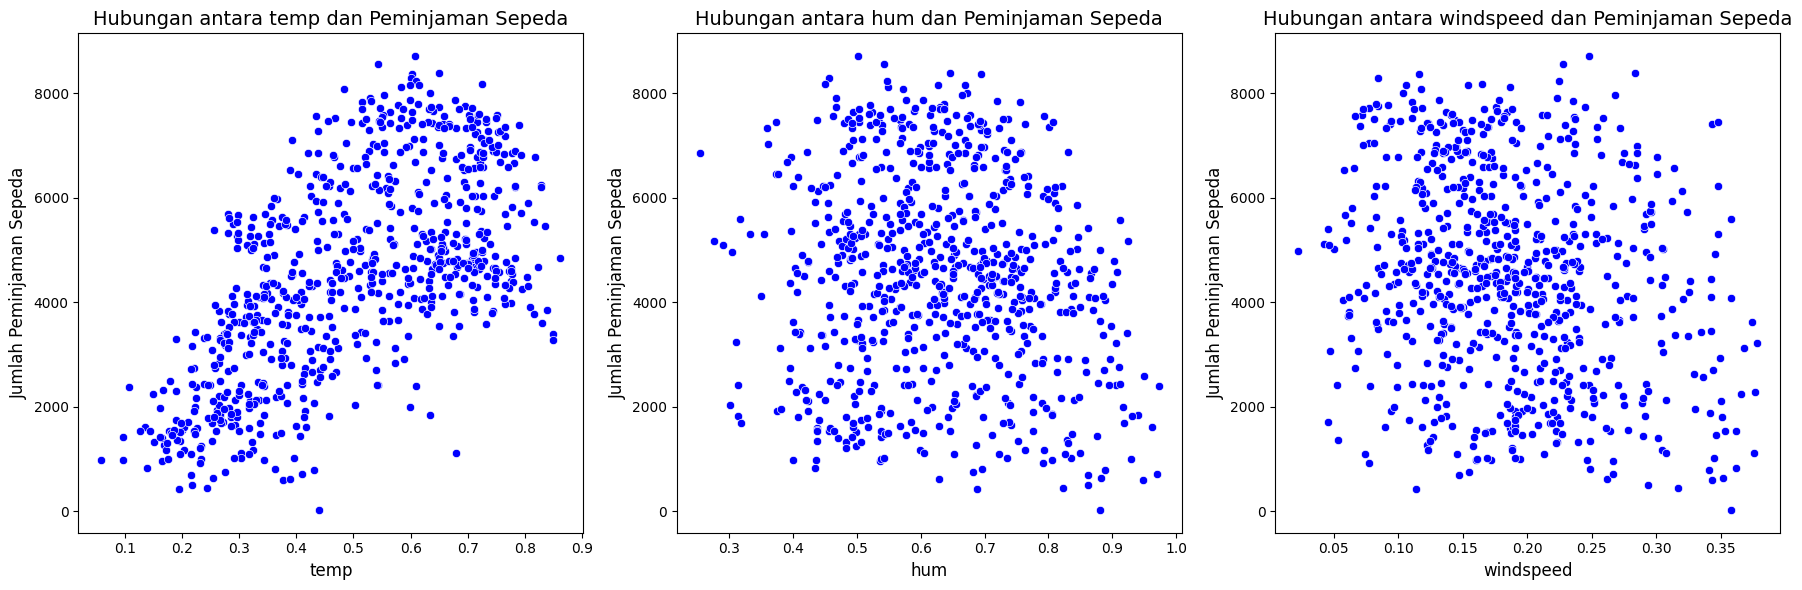

In [55]:
# Analisis hubungan antara temp, hum, windspeed, dan peminjaman sepeda
variables = ['temp', 'hum', 'windspeed']

plt.figure(figsize=(18, 6))

# Plot untuk masing-masing variabel
for i, var in enumerate(variables, 1):
    plt.subplot(1, 3, i)
    sns.scatterplot(data=df, x=var, y='cnt', color='blue')
    plt.title(f'Hubungan antara {var} dan Peminjaman Sepeda', fontsize=14)
    plt.xlabel(var, fontsize=12)
    plt.ylabel('Jumlah Peminjaman Sepeda', fontsize=12)

plt.tight_layout()
plt.show()

**Insight:**
1. Jumlah peminjaman sepeda terbanyak pada cuaca cerah/mendung, kemudian untuk tersedikit jumlahnya pada cuaca hujan ringan/snow
2. Jumlah season terbanyak pada season summer dengan jumlah 188 dan jumlah terkecil pada season fall dengan jumlah 178
3. Untuk jumlah dan rata-rata jumlah peminjaman sepeda terbanyak pada hari kerja
4. Pada tahun 2011 dengan hari kerja maka data yang dapat ditampilkan pada bulan Januari sampai Desember dengan jumlah 250 data.
5. Pada tahun 2012 dengan hari libur maka data yang dapat ditampilkan pada bulan Januari sampai Desember dengan jumlah 116 data.
6. Jumlah peminjaman sepeda terbanyak dilakukan pada orang yang berstatus sebagai member dari peminjaman sepeda dengan total 2672662 peminjaman
7. Peminjaman sepeda terbanyak dilakukan pada hari Jumat, kemudian untuk jumlah tersedikit pada hari Minggu
8. Dalam hubungan antara temp, hum, dan windspeed pada jumlah peminjaman sepeda menunjukkan bahwa:
	- Semakin suhu meningkat, maka jumlah peminjaman sepeda akan meningkat dan pada suhu tertinggi kan mengalami penurunan jumlah peminjaman sepeda
	- Peminjaman sepeda akan  meningkat jumlahnya pada kelembapan yang sedang
	- Dalam pengaruh kecepatan angin, jumlah peminjaman sepeda tidak terlalu berpengaruh pada kecepatan angin berapa pun


## Visualization & Explanatory Analysis

### 1. Apakah kondisi cuaca dan hari kerja dapat memengaruhi jumlah sepeda yang dipinjam?

#### Persebaran data berdasarkan jumlah kondisi cuaca

**Menampilkan visualisasi jumlah persebaran cuaca**

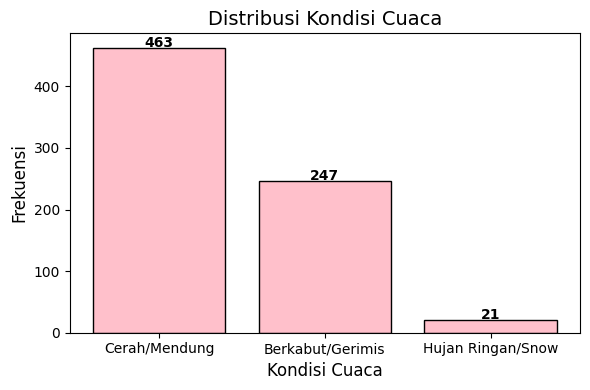

In [72]:
# Tambahkan label kondisi cuaca ke dataframe
df['weather_label'] = df['weathersit']

# Hitung distribusi kondisi cuaca
weather_distribution = df['weather_label'].value_counts().reset_index()
weather_distribution.columns = ['Kondisi Cuaca', 'Frekuensi']

# Buat bar plot
plt.figure(figsize=(6, 4))
bars = plt.bar(weather_distribution['Kondisi Cuaca'], weather_distribution['Frekuensi'], color='pink', edgecolor='black')

# Tambahkan angka di atas setiap bar
for bar in bars:
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() + 1,
        str(bar.get_height()),
        ha='center',
        fontsize=10,
        fontweight='bold'
    )

# Tambahkan judul dan label sumbu
plt.title("Distribusi Kondisi Cuaca", fontsize=14)
plt.xlabel("Kondisi Cuaca", fontsize=12)
plt.ylabel("Frekuensi", fontsize=12)

# Tampilkan plot
plt.tight_layout()
plt.show()

Jumlah persebaran cuaca terbanyak ada pada cuaca cerah/mendung dengan jumlah 463

#### Persebaran data rata-rata dan median dalam peminjaman sepeda berdasarkan cuaca


**Menampilkan visualisasi jumlah persebaran data rata-rata dan median dalam peminjaman sepeda berdasarkan cuaca**

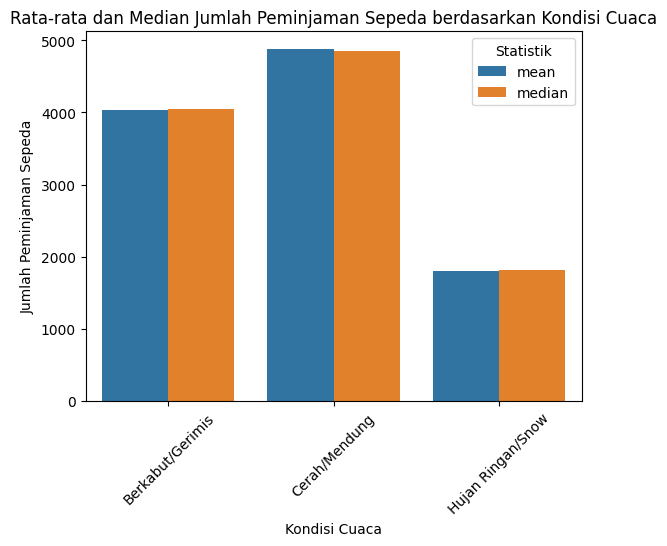

In [75]:
# Tambahkan label kondisi cuaca ke dataframe
df['weather_label'] = df['weathersit']

# Hitung rata-rata dan median jumlah peminjaman sepeda berdasarkan kondisi cuaca
summary_stats = df.groupby('weather_label')['cnt'].agg(['mean', 'median']).reset_index()

# Konversi data ke format panjang untuk visualisasi
summary_melted = pd.melt(summary_stats, id_vars='weather_label', value_vars=['mean', 'median'],
                         var_name='Statistik', value_name='Jumlah Peminjaman')

# Buat bar plot
sns.barplot(data=summary_melted, x='weather_label', y='Jumlah Peminjaman', hue='Statistik')

# Judul dan label
plt.title("Rata-rata dan Median Jumlah Peminjaman Sepeda berdasarkan Kondisi Cuaca")
plt.xlabel("Kondisi Cuaca")
plt.ylabel("Jumlah Peminjaman Sepeda")

# Memiringkan teks pada sumbu X agar lebih rapi
plt.xticks(rotation=45)

# Tampilkan grafik
plt.show()

**Menampilkan data rata-rata jumlah peminjaman sepeda berdasarkan hari kerja atau tidak**

<ipython-input-58-a146f7b0c50f>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=workingday_analysis, x='Working Day', y='Rata-rata Peminjaman', palette='Blues_d')


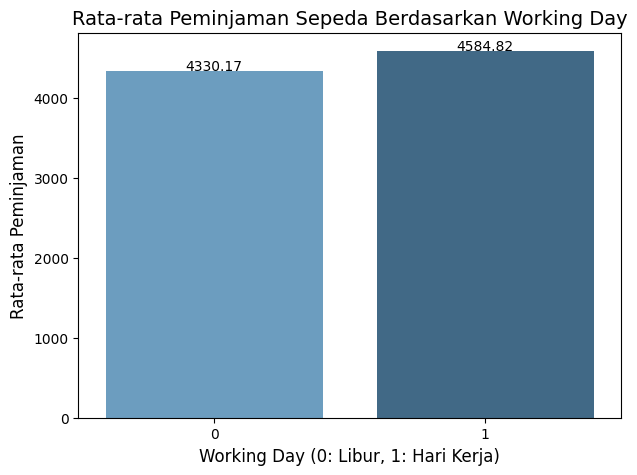

In [58]:
# Hitung rata-rata peminjaman sepeda berdasarkan workingday
workingday_analysis = df.groupby('workingday')['cnt'].mean().reset_index()
workingday_analysis.columns = ['Working Day', 'Rata-rata Peminjaman']

# Visualisasi rata-rata peminjaman berdasarkan Working Day
plt.figure(figsize=(7, 5))
sns.barplot(data=workingday_analysis, x='Working Day', y='Rata-rata Peminjaman', palette='Blues_d')
plt.title('Rata-rata Peminjaman Sepeda Berdasarkan Working Day', fontsize=14)
plt.xlabel('Working Day (0: Libur, 1: Hari Kerja)', fontsize=12)
plt.ylabel('Rata-rata Peminjaman', fontsize=12)
for index, row in workingday_analysis.iterrows():
    plt.text(index, row['Rata-rata Peminjaman'] + 10, round(row['Rata-rata Peminjaman'], 2), ha='center', fontsize=10)
plt.show()

Jumlah rata-rata peminjaman sepeda terbanyak pada hari kerja dengan jumlah 4584,82

###2. Bagaimana hubungan suhu dan kelembapan dengan jumlah peminjaman sepeda?

**Hubungan antara suhu dan kelembapan dengan jumlah peminjaman sepeda**

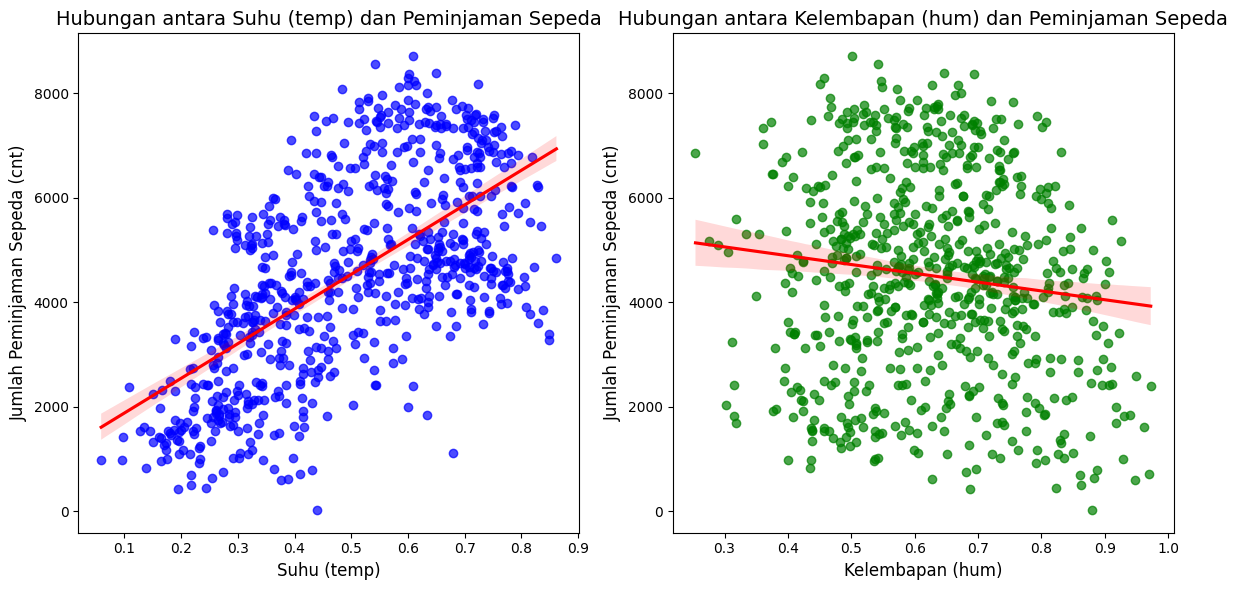

In [59]:
# Ukuran figure
plt.figure(figsize=(12, 6))

# Scatter plot hubungan suhu dengan jumlah peminjaman sepeda
plt.subplot(1, 2, 1)
sns.regplot(data=df, x='temp', y='cnt', color='blue', line_kws={'color': 'red'}, scatter_kws={'alpha': 0.7})
plt.title('Hubungan antara Suhu (temp) dan Peminjaman Sepeda', fontsize=14)
plt.xlabel('Suhu (temp)', fontsize=12)
plt.ylabel('Jumlah Peminjaman Sepeda (cnt)', fontsize=12)

# Scatter plot hubungan kelembapan dengan jumlah peminjaman sepeda
plt.subplot(1, 2, 2)
sns.regplot(data=df, x='hum', y='cnt', color='green', line_kws={'color': 'red'}, scatter_kws={'alpha': 0.7})
plt.title('Hubungan antara Kelembapan (hum) dan Peminjaman Sepeda', fontsize=14)
plt.xlabel('Kelembapan (hum)', fontsize=12)
plt.ylabel('Jumlah Peminjaman Sepeda (cnt)', fontsize=12)

plt.tight_layout()
plt.show()

**Insight:**
1. Jumlah peminjaman sepeda terbanyak pada cuaca cerah/mendung, kemudian untuk tersedikit jumlahnya pada cuaca hujan ringan/snow
2. Untuk jumlah rata-rata peminjaman sepeda terbanyak pada hari kerja
3. Dalam hubungan antara temp, hum, dan windspeed pada jumlah peminjaman sepeda menunjukkan bahwa:
	- semakin suhu meningkat, maka jumlah peminjaman sepeda akan meningkat dan pada suhu tertinggi kan mengalami penurunan jumlah peminjaman sepeda
	- Peminjaman sepeda akan berdasarkan kelembapan tidak berpengaruh signifikan baik pada kelembapan tinggi atau rendah

## Conclusion

### **Conclusion**

1. **Pengaruh kondisi cuaca dan hari kerja terhadap jumlah peminjaman sepeda**:
   - Jumlah peminjaman sepeda **terbanyak** terjadi pada cuaca **cerah atau mendung**, yang menunjukkan bahwa kondisi cuaca yang nyaman dan tidak ekstrem mendukung aktivitas bersepeda.
   - Sebaliknya, jumlah peminjaman sepeda **tersedikit** terjadi pada cuaca **hujan ringan atau salju**, yang dapat menunjukkan bahwa kondisi cuaca buruk cenderung mengurangi aktivitas bersepeda.
   - Rata-rata jumlah peminjaman sepeda **lebih tinggi pada hari kerja** dibandingkan dengan akhir pekan. Hal ini mungkin disebabkan oleh penggunaan sepeda sebagai sarana transportasi untuk bekerja atau aktivitas rutin lainnya pada hari kerja.

2. **Hubungan antara Suhu dan Kelembapan dengan jumlah peminjaman sepeda**:
   - Suhu: Peningkatan suhu cenderung meningkatkan jumlah peminjaman sepeda hingga suhu tertentu. Namun, pada suhu yang terlalu tinggi, terjadi penurunan jumlah peminjaman, kemungkinan karena kondisi yang terlalu panas menjadi tidak nyaman untuk bersepeda.
   - Kelembapan: Tingkat kelembapan tidak memiliki pengaruh signifikan terhadap jumlah peminjaman sepeda. Baik pada kelembapan tinggi maupun rendah, jumlah peminjaman tetap stabil.